Cod aplicatie:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import  (confusion_matrix, ConfusionMatrixDisplay)

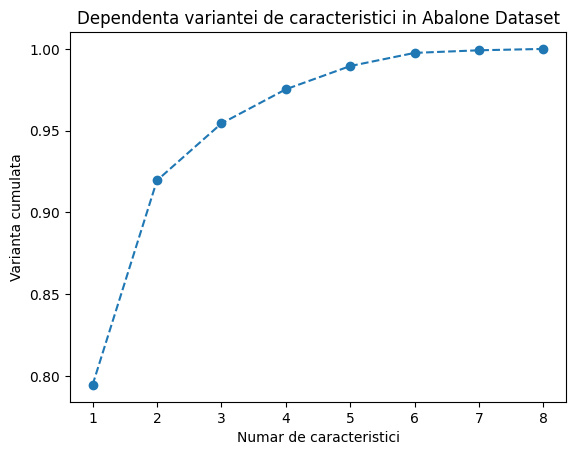

Number of components selected: 5


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Abalone dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
abalone_data = pd.read_csv(url, header=None, names=names)

# Separate features (X) and target variable (y)
X = abalone_data.drop("Rings", axis=1)
y = abalone_data["Rings"]

# Convert categorical variable 'Sex' to numerical
X["Sex"] = pd.Categorical(X["Sex"]).codes

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Numar de caracteristici')
plt.ylabel('Varianta cumulata')
plt.title('Dependenta variantei de caracteristici in Abalone Dataset')
plt.show()

# Choose the number of components that explain a certain percentage of variance (e.g., 95%)
threshold_variance = 0.98
num_components = np.argmax(cumulative_explained_variance >= threshold_variance) + 1

# Retain only the selected components
X_pca_selected = X_pca[:, :num_components]

# Print the number of selected components
print(f"Number of components selected: {num_components}")


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM on the original data
svm_original = SVC(kernel='linear', gamma=1, C=10, random_state=42)
svm_original.fit(X_train, y_train)

# Predict on the test set
y_pred_original = svm_original.predict(X_test)

# Calculate accuracy on the original data
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy on the original data: {accuracy_original:.2f}")

# Train SVM on the reduced data (selected principal components)
X_train_reduced, X_test_reduced = train_test_split(X_pca_selected, test_size=0.2, random_state=42)

svm_reduced = SVC(kernel='rbf', gamma=0.1, C=1, random_state=42)
svm_reduced.fit(X_train_reduced, y_train)

# Predict on the reduced data test set
y_pred_reduced = svm_reduced.predict(X_test_reduced)

# Calculate accuracy on the reduced data
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Accuracy on the reduced data: {accuracy_reduced:.2f}")

Accuracy on the original data: 0.27
Accuracy on the reduced data: 0.30


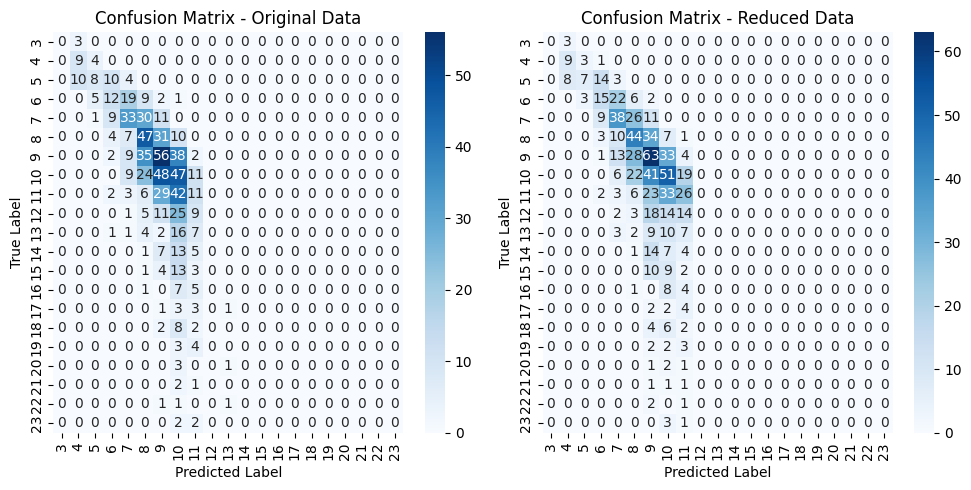

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Calculate confusion matrices
cm_original = confusion_matrix(y_test, y_pred_original)
cm_reduced = confusion_matrix(y_test, y_pred_reduced)

# Visualize confusion matrix for the original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix - Original Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Visualize confusion matrix for the reduced data
plt.subplot(1, 2, 2)
sns.heatmap(cm_reduced, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix - Reduced Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy on the original data (Decision Tree): 0.26


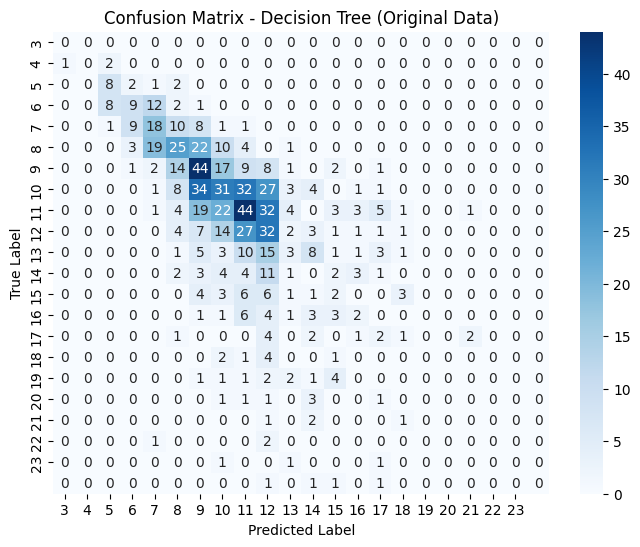

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy on the reduced data (Decision Tree): 0.26


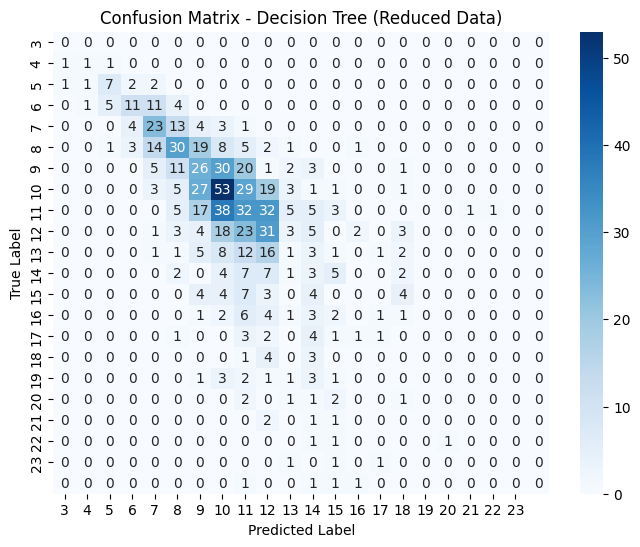

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for Decision Tree on the original data
param_grid_dt_original = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt_original = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt_original, cv=5)
grid_search_dt_original.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_dt_original = grid_search_dt_original.best_params_

# Train Decision Tree on the original data with best hyperparameters
dt_original = DecisionTreeClassifier(random_state=42, **best_params_dt_original)
dt_original.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_original = dt_original.predict(X_test_scaled)

# Evaluate accuracy for the original data
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy on the original data (Decision Tree): {accuracy_original:.2f}")

# Visualize confusion matrix for the original data
cm_original = confusion_matrix(y_test, y_pred_original)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix - Decision Tree (Original Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Train Decision Tree on the reduced data (selected principal components)
X_train_reduced, X_test_reduced = train_test_split(X_pca_selected, test_size=0.2, random_state=42)

# Hyperparameter tuning for Decision Tree on the reduced data
param_grid_dt_reduced = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt_reduced = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt_reduced, cv=5)
grid_search_dt_reduced.fit(X_train_reduced, y_train)

# Get the best parameters
best_params_dt_reduced = grid_search_dt_reduced.best_params_

# Train Decision Tree on the reduced data with best hyperparameters
dt_reduced = DecisionTreeClassifier(random_state=42, **best_params_dt_reduced)
dt_reduced.fit(X_train_reduced, y_train)

# Predict on the reduced data test set
y_pred_reduced = dt_reduced.predict(X_test_reduced)

# Evaluate accuracy for the reduced data
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Accuracy on the reduced data (Decision Tree): {accuracy_reduced:.2f}")

# Visualize confusion matrix for the reduced data
cm_reduced = confusion_matrix(y_test, y_pred_reduced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_reduced, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title('Confusion Matrix - Decision Tree (Reduced Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Codul include mai multe funcții importante din biblioteca scikit-learn și nu numai. Principalele funcții utilizate:

1. *train_test_split (scikit-learn):*
   - *Folosire:* `train_test_split(X, y, test_size=0.2, random_state=42)`
   - *Explicație:* Această funcție divide setul de date în două părți: setul de antrenament și setul de testare. `X` și `y` sunt caracteristicile și variabila țintă, iar `test_size` specifică proporția de date alocate pentru testare.

2. *StandardScaler (scikit-learn):*
   - *Folosire:* `scaler = StandardScaler(); X_train_scaled = scaler.fit_transform(X_train)`
   - *Explicație:* Standardizarea este importantă pentru algoritmi precum SVM și arbori de decizie. Această funcție standardizează caracteristicile prin eliminarea mediei și scalarea la deviația standard, asigurând că toate caracteristicile au aceeași scară.

3. *DecisionTreeClassifier (scikit-learn):*
   - *Folosire:* `DecisionTreeClassifier(random_state=42)`
   - *Explicație:* Această funcție construiește un model de arbore de decizie. Parametrii precum `max_depth`, `min_samples_split` și `min_samples_leaf` influențează structura arborelui și pot fi optimizați pentru îmbunătățirea performanței.

4. *GridSearchCV (scikit-learn):*
   - *Folosire:* `GridSearchCV(estimator, param_grid, cv=cv_stratified)`
   - *Explicație:* Această funcție efectuează o căutare pe grilă pentru optimizarea hyperparametrilor unui estimator dat. `param_grid` specifică grila hyperparametrilor, iar `cv` specifică strategia de validare încrucișată.

5. *StratifiedKFold (scikit-learn):*
   - *Folosire:* `StratifiedKFold(n_splits=5, shuffle=True, random_state=42)`
   - **Explicație:** Această funcție implementează o validare încrucișată stratificată, asigurând distribuția proporțională a claselor în fiecare fold.

6. *accuracy_score (scikit-learn):*
   - *Folosire:* `accuracy_score(y_true, y_pred)`
   - *Explicație:* Calculează precizia modelului, care reprezintă proporția de predicții corecte în raport cu totalul de predicții.

7. *confusion_matrix (scikit-learn):*
   - *Folosire:* `confusion_matrix(y_true, y_pred)`
   - *Explicație:* Calculează o matrice de confuzie care oferă o viziune detaliată asupra performanței modelului, arătând numărul de adevărate pozitive, adevărate negative, fals pozitive și fals negative.

8. *sns.heatmap (seaborn și matplotlib):*
   - *Folosire:* `sns.heatmap(data, annot=True, fmt='d', cmap='Blues', xticklabels=..., yticklabels=...)`
   - *Explicație:* Această funcție este utilizată pentru a vizualiza matricile de confuzie sub formă de heatmap (hartă termică), făcând mai ușor să se observe modelele și erorile de clasificare.